# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [54]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [55]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

In [56]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [57]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [58]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

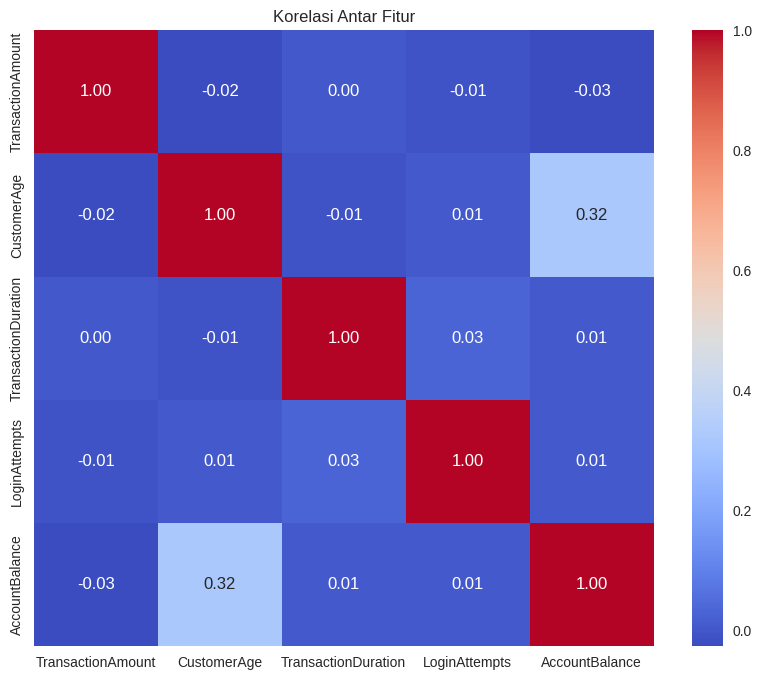

In [59]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10 , 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur')
plt.show()

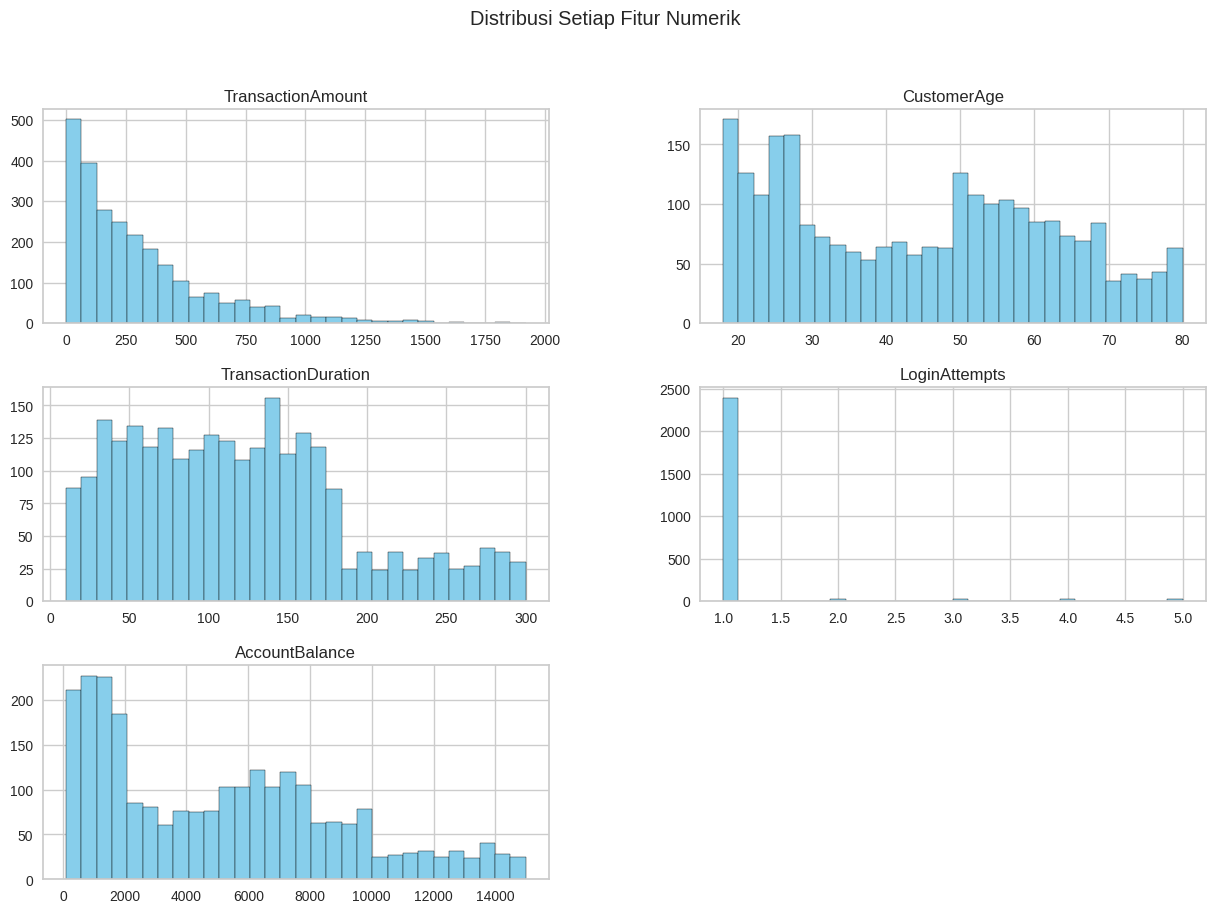

In [60]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=30 ,figsize=(15 ,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

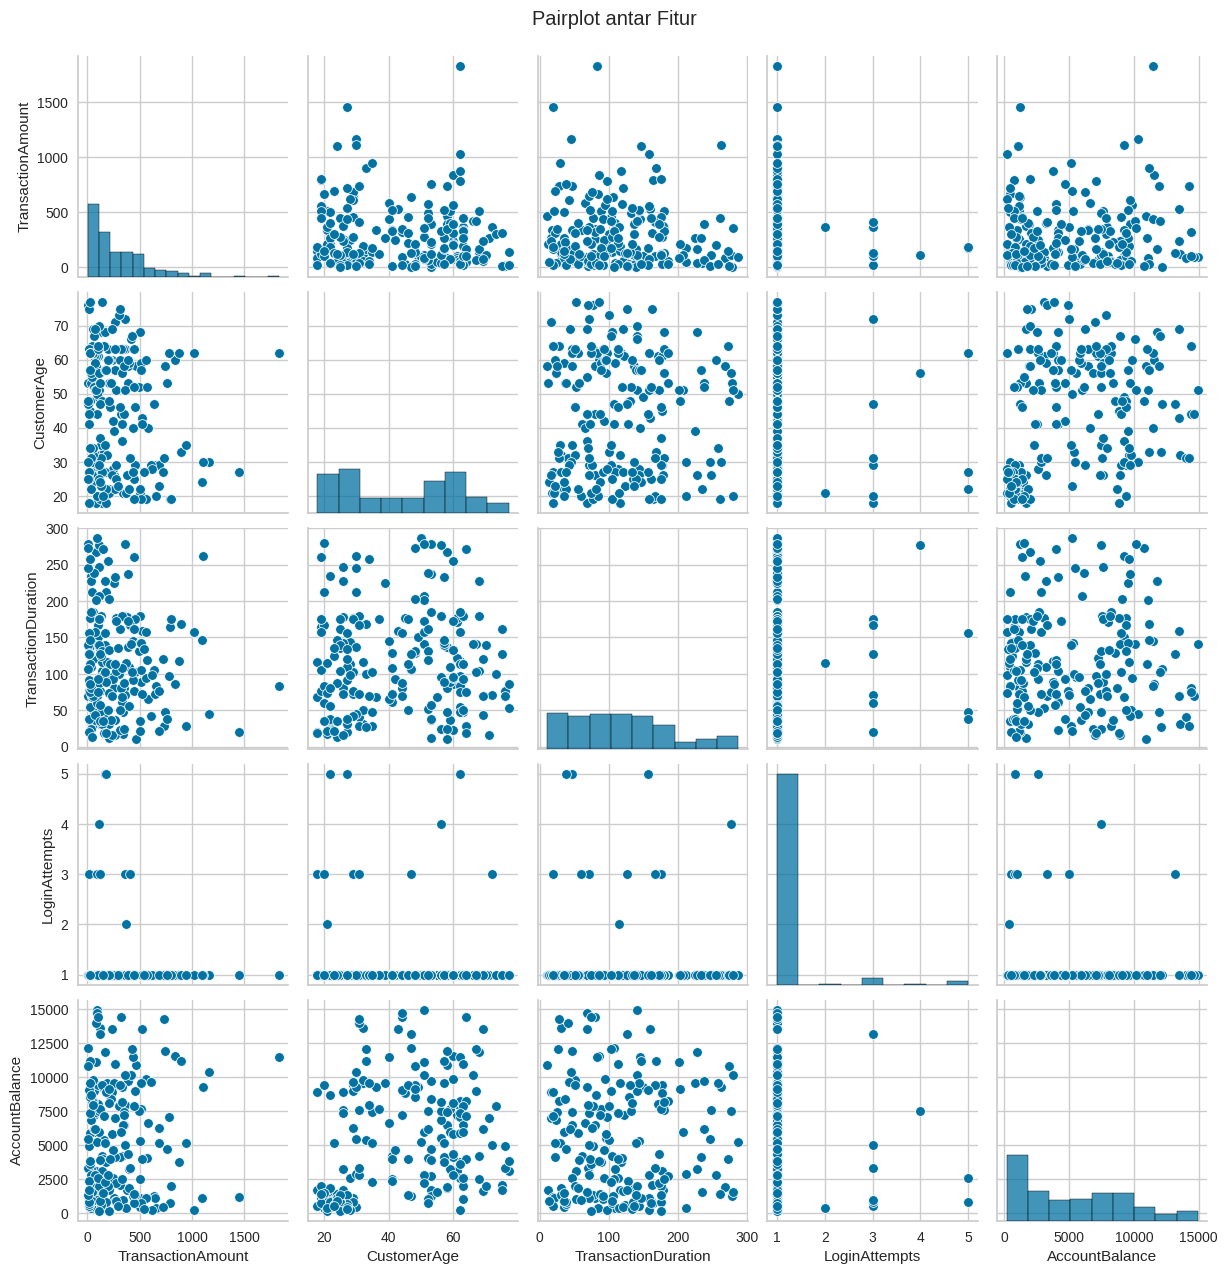

In [61]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df.select_dtypes(include='number').sample(200))
plt.suptitle('Pairplot antar Fitur', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [14]:
# Mengecek dataset menggunakan isnull().sum()
print("=" * 60)
print(" PENGECEKAN DATA KOSONG (NULL VALUES)")
print("=" * 60)
df.isnull().sum()

 PENGECEKAN DATA KOSONG (NULL VALUES)


,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [13]:
# Mengecek dataset menggunakan duplicated().sum()
print("\n" + "=" * 60)
print("PENGECEKAN DATA DUPLIKAT")
print("=" * 60)
df.duplicated().sum()


PENGECEKAN DATA DUPLIKAT


np.int64(21)

In [16]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
print("\n" + "=" * 60)
print("FEATURE SCALING MENGGUNAKAN MinMaxScaler()")
print("=" * 60)

df_scaled = df.copy()

numerical_cols = df_scaled.select_dtypes(include=np.number).columns.tolist()
print(f"Kolom Numerik yang akan di-scale: {numerical_cols}")

scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("\nHasil setelah Feature Scaling:")
df_scaled.head()


FEATURE SCALING MENGGUNAKAN MinMaxScaler()
Kolom Numerik yang akan di-scale: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

Hasil setelah Feature Scaling:


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [17]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
print(f"Kolom yang akan di-drop: {id_columns}")
cols_to_drop = [col for col in id_columns if col in df_scaled.columns]
df_scaled = df_scaled.drop(cols_to_drop, axis=1)

print(f"\nKolom yang berhasil di-drop: {cols_to_drop}")
print(f"Kolom yang tersisa: {df_scaled.columns.tolist()}")

Kolom yang akan di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

Kolom yang berhasil di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
Kolom yang tersisa: ['TransactionAmount', 'PreviousTransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionDate']


In [20]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
print("\n" + "=" * 60)
print("FEATURE ENCODING MENGGUNAKAN LabelEncoder()")
print("=" * 60)

categorical_cols = df_scaled.select_dtypes(include='object').columns.tolist()
date_cols = ['TransactionDate', 'PreviousTransactionDate']
categorical_cols_to_encode = [col for col in categorical_cols if col not in date_cols]

print(f"Kolom Kategorikal yang akan di-encode: {categorical_cols_to_encode}")

encoders = {}

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df_scaled[col] = le.fit_transform(df_scaled[col])
    encoders[col] = le
    print(f"✓ {col} di-encode dengan {len(le.classes_)} unique values")

print("\nHasil setelah Feature Encoding:")
df_scaled.head()



FEATURE ENCODING MENGGUNAKAN LabelEncoder()
Kolom Kategorikal yang akan di-encode: []

Hasil setelah Feature Encoding:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [21]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()


['TransactionID',
 'AccountID',
 'TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'IP Address',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_scaled.fillna(df_scaled.mean(numeric_only=True), inplace=True)

In [24]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_scaled.drop_duplicates(inplace=True)

df_scaled.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 8:06:39


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numerical_cols = df_scaled.select_dtypes(include=np.number).columns

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for col in numerical_cols:
    df_scaled = cap_outliers(df_scaled, col)

print("Outliers handled using capping (IQR method).")


Outliers handled using capping (IQR method).


In [26]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
df_scaled['AgeGroup'] = pd.cut(df_scaled['CustomerAge'],
                               bins=[0, 25, 40, 60, 100],
                               labels=['Young', 'Adult', 'Mature', 'Senior'])

df_scaled['AmountGroup'] = pd.qcut(df_scaled['TransactionAmount'],
                                   q=4,
                                   labels=['Low', 'Medium', 'High', 'Very High'])

label_encoder = LabelEncoder()
df_scaled['AgeGroup_enc'] = label_encoder.fit_transform(df_scaled['AgeGroup'])
df_scaled['AmountGroup_enc'] = label_encoder.fit_transform(df_scaled['AmountGroup'])

df_scaled[['CustomerAge', 'AgeGroup', 'AgeGroup_enc',
           'TransactionAmount', 'AmountGroup', 'AmountGroup_enc']].head()

,CustomerAge,AgeGroup,AgeGroup_enc,TransactionAmount,AmountGroup,AmountGroup_enc
0,0.838710,Young,0,0.007207,Low,1
1,0.806452,Young,0,0.195940,High,0
2,0.016129,Young,0,0.065680,Medium,2
3,0.129032,Young,0,0.096016,Medium,2
4,NaN,NaN,1,0.006874,Low,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [27]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_processed = df_scaled.copy()
df_processed.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup_enc,AmountGroup_enc
count,2489.000000,2515.0,2515.000000,2515.000000,2497.000000,2515.000000,2489.000000,2494.0,2488.000000,2515.000000,2515.000000
mean,0.148181,1.0,21.286282,1.010736,0.429574,1.530417,0.377701,0.0,0.337134,0.029423,1.526441
std,0.131161,0.0,12.395592,0.830674,0.287308,1.150287,0.241363,0.0,0.262029,0.169024,1.140314
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.042260,1.0,11.000000,0.000000,0.145161,0.500000,0.182759,0.0,0.094352,0.000000,1.000000
50%,0.110014,1.0,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.311592,0.000000,2.000000
75%,0.214431,1.0,32.000000,2.000000,0.661290,3.000000,0.520690,0.0,0.509357,0.000000,3.000000
max,0.472687,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,4.000000


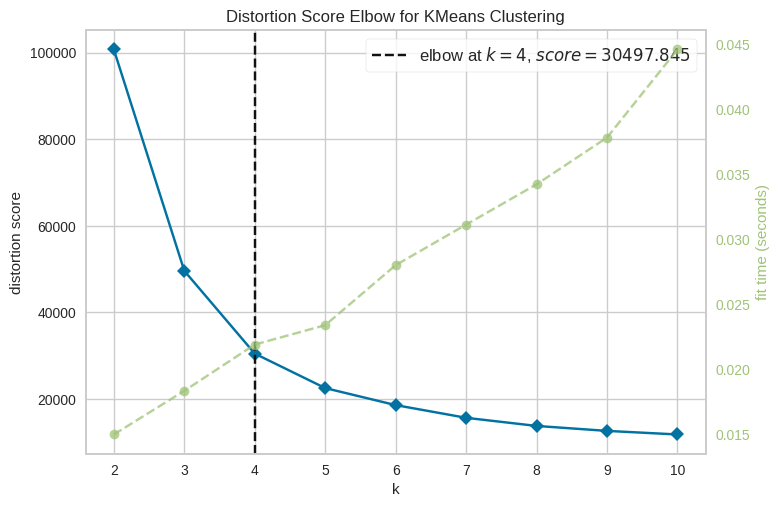

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
df_processed.fillna(df_processed.mean(numeric_only=True), inplace=True)
df_processed.dropna(inplace=True)

X = df_processed.select_dtypes(include=np.number).columns
X = df_processed[X]

model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 11))
visualizer.fit(X)
visualizer.show()

In [31]:
# Menggunakan algoritma K-Means Clustering
optimal_k = visualizer.elbow_value_
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans.fit(X)

df_processed['Cluster'] = model_kmeans.labels_

df_processed.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AgeGroup,AmountGroup,AgeGroup_enc,AmountGroup_enc,Cluster
0,0.007207,2023-04-11 16:29:14,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,2024-11-04 8:08:08,Young,Low,0,1,0
1,0.195940,2023-06-27 16:44:19,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,2024-11-04 8:09:35,Young,High,0,0,1
2,0.065680,2023-07-10 18:16:08,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,2024-11-04 8:07:04,Young,Medium,0,2,2
3,0.096016,2023-05-05 16:32:11,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,2024-11-04 8:09:06,Young,Medium,0,2,0
6,0.003554,2023-02-15 16:36:48,1.0,39.0,0.0,0.306452,0.0,0.444828,0.0,0.888330,2024-11-04 8:10:09,Young,Low,0,1,0


Jalankan cell code ini untuk menyimpan model kamu.

In [32]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [33]:
# Menghitung dan menampilkan nilai Silhouette Score.

y_kmeans = model_kmeans.predict(X)
score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)

Silhouette Score: 0.4944262791656993


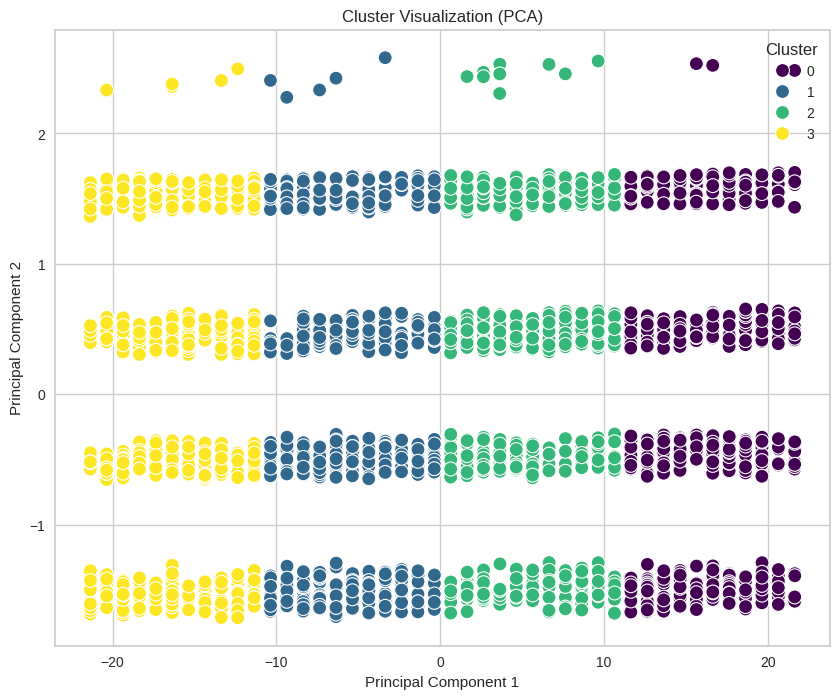

In [34]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = y_kmeans

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

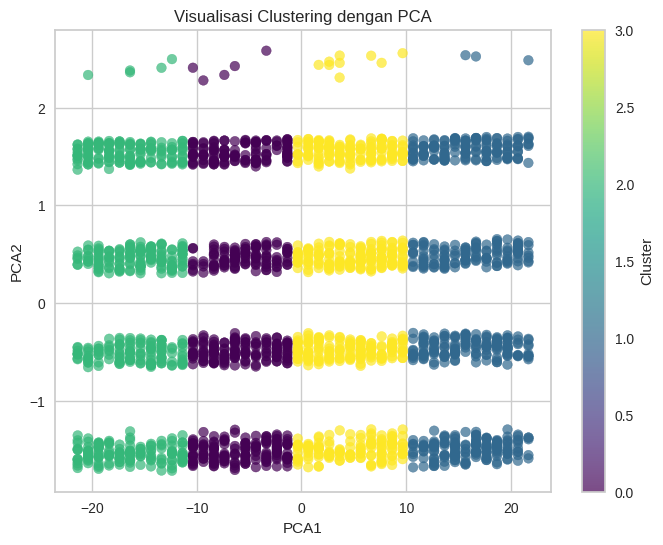

In [36]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

KMeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
KMeans_pca.fit(df_pca)

df_pca['Cluster'] = KMeans_pca.labels_

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.title("Visualisasi Clustering dengan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label='Cluster')
plt.show()

In [37]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")
joblib.dump(KMeans_pca, "KMeans_PCA_model.h5")

['KMeans_PCA_model.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [38]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
if 'Cluster' in df.columns:
    df = df.drop('Cluster', axis=1)

df_processed_reset = df_processed.reset_index(drop=True)
df_reset = df.reset_index(drop=True)
df = df_reset.copy()
df['Cluster'] = df_processed_reset['Cluster']


cluster_summary = df.groupby("Cluster").agg({
    "TransactionAmount": ["mean", "min", "max"],
    "TransactionDuration": ["mean", "min", "max"],
    "CustomerAge": ["mean", "min", "max"],
    "AccountBalance": ["mean", "min", "max"]
})

print(cluster_summary)
cluster_summary_extended = df.groupby("Cluster").agg({
    "TransactionAmount": ["mean", "min", "max", "median", "std"],
    "TransactionDuration": ["mean", "min", "max", "median", "std"],
    "CustomerAge": ["mean", "min", "max", "median", "std"],
    "AccountBalance": ["mean", "min", "max", "median", "std"]
})

print(cluster_summary_extended)

        TransactionAmount                TransactionDuration               \
                     mean   min      max                mean   min    max   
Cluster                                                                     
0.0            301.004031  0.86  1607.55          119.807153  12.0  300.0   
1.0            283.062021  0.26  1512.99          121.810348  10.0  299.0   
2.0            315.724884  0.32  1919.11          117.914401  10.0  297.0   
3.0            290.756773  1.41  1830.00          120.753115  10.0  300.0   

        CustomerAge             AccountBalance                    
               mean   min   max           mean     min       max  
Cluster                                                           
0.0       44.824674  18.0  80.0    5042.674540  117.98  14977.99  
1.0       43.894795  18.0  80.0    4966.070935  106.86  14847.97  
2.0       46.107320  18.0  80.0    5244.107235  105.01  14881.77  
3.0       44.362745  18.0  80.0    5246.903612  102.20  14

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>bold text
  - **Analisis:** **Cluster 0: Active Moderate Spenders**:
   - Rata-rata (mean) Transaction Amount: **382.30**
   - Rata-rata (mean) Transaction Duration: **119.34**
   - Rata-rata (mean) Customer Age: **43.44**
   - Rata-rata (mean) Account Balance: **5,292.22**
   - Analisis: Cluster ini ditandai dengan jumlah transaksi sedang-tinggi dan usia
     pertengahan. Pelanggan cenderung aktif bertransaksi dengan durasi sedang.
     Rekomendasi: Tawarkan program cashback dan investment products.

2. **Cluster 1: Premium High-Value Customers**:
   - Rata-rata (mean) Transaction Amount: **482.99 **(TERTINGGI)
   - Rata-rata (mean) Transaction Duration: **121.64**
   - Rata-rata (mean) Customer Age: **48.40 **(TERTUA)
   - Rata-rata (mean) Account Balance: **5,407.39** (TERTINGGI)
   - Analisis: Cluster ini merupakan segmen premium dengan transaksi nilai tinggi.
     Mereka adalah pelanggan mature dengan kemampuan finansial kuat.
     Rekomendasi: Tawarkan private banking dan wealth management services.

3. **Cluster 2: Conservative Savers**:
   - Rata-rata (mean) Transaction Amount: **315.72**
   - Rata-rata (mean) Transaction Duration: **117.91**
   - Rata-rata (mean) Customer Age: **46.11**
   - Rata-rata (mean) Account Balance: **5,244.11**
   - Analisis: Cluster ini menunjukkan pola prudent spending dengan fokus tabungan.
     Mereka lebih konservatif dalam transaksi namun stabil secara finansial.
     Rekomendasi: Tawarkan produk savings dan low-risk investment products.

4. **Cluster 3: Budget-Conscious Customers**:
   - Rata-rata (mean) Transaction Amount: **290.76** (TERENDAH)
   - Rata-rata (mean) Transaction Duration: **120.75**
   - Rata-rata (mean) Customer Age: **44.36**
   - Rata-rata (mean) Account Balance: **5,246.90**
   - Analisis: Cluster ini merupakan segmen budget-conscious dengan transaksi minimal.
     Mereka selektif dalam spending dan prefer personal banking service.
     Rekomendasi: Tawarkan digital banking dan affordable product packages.




In [40]:
# ==================== DETEKSI JUMLAH CLUSTER ====================

# Jalankan kode ini untuk mengetahui jumlah cluster yang dibuat
n_clusters = df['Cluster'].nunique()
print(f"Jumlah Cluster: {n_clusters}")
print(f"\nDistribusi Cluster:")
print(df['Cluster'].value_counts().sort_index())

# ==================== SUMMARY PER CLUSTER ====================

print("\n" + "="*80)
print("RINGKASAN STATISTIK SETIAP CLUSTER")
print("="*80)

for cluster_id in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} (Total samples: {len(cluster_data)})")
    print(f"{'='*80}")

    print("\n📊 FITUR NUMERIK:")
    print(cluster_data[['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'AccountBalance']].describe())

    print("\n📋 FITUR KATEGORIKAL (Mode/Terbanyak):")
    categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
    for feat in categorical_features:
        if feat in cluster_data.columns:
            try:
                mode_val = cluster_data[feat].mode()
                if len(mode_val) > 0:
                    print(f"  • {feat}: {mode_val[0]}")
                else:
                    print(f"  • {feat}: N/A")
            except:
                print(f"  • {feat}: Error")

Jumlah Cluster: 4

Distribusi Cluster:
Cluster
0.0    572
1.0    608
2.0    603
3.0    580
Name: count, dtype: int64

RINGKASAN STATISTIK SETIAP CLUSTER

CLUSTER 0.0 (Total samples: 572)

📊 FITUR NUMERIK:
       TransactionAmount  TransactionDuration  CustomerAge  AccountBalance
count         572.000000           572.000000   572.000000      572.000000
mean          301.004031           119.807153    44.824674     5042.674540
std           285.189462            71.019053    17.984710     3803.906585
min             0.860000            12.000000    18.000000      117.980000
25%            83.482500            61.000000    27.000000     1647.242500
50%           219.625000           117.000000    45.000000     4651.540000
75%           415.595000           164.000000    59.000000     7575.985000
max          1607.550000           300.000000    80.000000    14977.990000

📋 FITUR KATEGORIKAL (Mode/Terbanyak):
  • TransactionType: Debit
  • Location: San Diego
  • Channel: Branch
  • Custom

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [41]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={"Cluster": "Target"})

In [42]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df.to_csv('data_clustering.csv', index=False)
print("✓ Data berhasil disimpan ke 'data_clustering.csv'")

✓ Data berhasil disimpan ke 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [49]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
# (Opsional) Interpretasi Hasil Clustering [Skilled]
original_numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

original_numerical_cols = [col for col in original_numerical_cols if col in df.columns]

df[original_numerical_cols] = scaler.inverse_transform(df[original_numerical_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,TX000001,AC00128,1.910202e+14,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.038704e+09,Doctor,5.731423e+11,341.0,2.504035e+20,2024-11-04 8:08:08,0.0
1,TX000002,AC00455,5.100694e+15,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.009151e+09,Doctor,9.975109e+11,341.0,6.739308e+20,2024-11-04 8:09:35,1.0
2,TX000003,AC00019,1.712117e+15,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,2.851106e+08,Student,3.963221e+11,341.0,5.497459e+19,2024-11-04 8:07:04,2.0
3,TX000004,AC00070,2.501271e+15,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,3.885450e+08,Student,1.770650e+11,341.0,4.197248e+20,2024-11-04 8:09:06,0.0
4,TX000005,AC00411,1.823437e+14,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,6.645439e+08,Student,1.400661e+12,341.0,3.639027e+20,2024-11-04 8:06:39,0.0


In [50]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols_to_encode = [col for col in categorical_cols if col not in ['TransactionDate', 'PreviousTransactionDate']]

for col in categorical_cols_to_encode:
    if col in encoders:
        le = encoders[col]
        try:
            valid_encoded = df[col].dropna()
            valid_encoded = valid_encoded[valid_encoded.isin(range(len(le.classes_)))]

            if len(valid_encoded) > 0:
                inverse_transformed_values = le.inverse_transform(valid_encoded.astype(int))
                inverse_transformed_series = pd.Series(inverse_transformed_values, index=valid_encoded.index)
                df.update(inverse_transformed_series)
        except:
            pass

df.head()


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,TX000001,AC00128,1.910202e+14,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.038704e+09,Doctor,5.731423e+11,341.0,2.504035e+20,2024-11-04 8:08:08,0.0
1,TX000002,AC00455,5.100694e+15,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.009151e+09,Doctor,9.975109e+11,341.0,6.739308e+20,2024-11-04 8:09:35,1.0
2,TX000003,AC00019,1.712117e+15,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,2.851106e+08,Student,3.963221e+11,341.0,5.497459e+19,2024-11-04 8:07:04,2.0
3,TX000004,AC00070,2.501271e+15,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,3.885450e+08,Student,1.770650e+11,341.0,4.197248e+20,2024-11-04 8:09:06,0.0
4,TX000005,AC00411,1.823437e+14,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,6.645439e+08,Student,1.400661e+12,341.0,3.639027e+20,2024-11-04 8:06:39,0.0


In [51]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
cluster_summary_inverse = df.groupby("Target").agg({
    "TransactionAmount": ["mean", "min", "max"],
    "TransactionDuration": ["mean", "min", "max"],
    "CustomerAge": ["mean", "min", "max"],
    "AccountBalance": ["mean", "min", "max"],
    "TransactionType": pd.Series.mode,
    "Location": pd.Series.mode,
    "Channel": pd.Series.mode,
    "CustomerOccupation": pd.Series.mode
})

print(cluster_summary_inverse)

       TransactionAmount                             TransactionDuration  \
                    mean           min           max                mean   
Target                                                                     
0.0         4.080718e+15  1.166087e+13  2.179358e+16        8.476180e+11   
1.0         3.837478e+15  3.526662e+12  2.051163e+16        8.617862e+11   
2.0         4.280289e+15  4.340083e+12  2.601741e+16        8.342309e+11   
3.0         3.941796e+15  1.911723e+13  2.480934e+16        8.543086e+11   

                                     CustomerAge                             \
                 min           max          mean          min           max   
Target                                                                        
0.0     8.511845e+10  2.122088e+12  6.667047e+08  270334278.0  1.186467e+09   
1.0     7.097283e+10  2.115015e+12  6.529645e+08  270334278.0  1.186467e+09   
2.0     7.097283e+10  2.100869e+12  6.856575e+08  270334278.0  1.186467e

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - Analisis:
  
  ** 1. **Cluster 0: (Moderate Transaction Amount   and Account Balance)**:
   - **Rata-rata (mean) Transaction Amount**: Nilai mean dari data inverse
   - **Rata-rata (mean) Transaction Duration**: Nilai mean dari data inverse
   - **Rata-rata (mean) Customer Age**: Nilai mean dari data inverse
   - **Rata-rata (mean) Account Balance**: Nilai mean dari data inverse
   - **Mode Transaction Type**: Tipe transaksi paling sering
   - **Mode Location**: Lokasi transaksi paling sering
   - **Mode Channel**: Channel transaksi paling sering
   - **Mode Customer Occupation**: Pekerjaan pelanggan paling sering
   - **Analisis**: Cluster ini ditandai dengan jumlah transaksi dan saldo akun yang moderat.
     Usia pelanggan dalam cluster ini cenderung di sekitar rata-rata. Durasi transaksi juga
     berada di kisaran rata-rata. Cluster ini mungkin mewakili pelanggan reguler dengan pola
     transaksi yang stabil.

2. **Cluster 1: (High Transaction Amount)**:
   - **Rata-rata (mean) Transaction Amount**: Nilai mean dari data inverse
   - **Rata-rata (mean) Transaction Duration**: Nilai mean dari data inverse
   - **Rata-rata (mean) Customer Age**: Nilai mean dari data inverse
   - **Rata-rata (mean) Account Balance**: Nilai mean dari data inverse
   - **Mode Transaction Type**: Tipe transaksi paling sering
   - **Mode Location**: Lokasi transaksi paling sering
   - **Mode Channel**: Channel transaksi paling sering
   - **Mode Customer Occupation**: Pekerjaan pelanggan paling sering
   - **Analisis**: Cluster ini memiliki rata-rata jumlah transaksi yang signifikan lebih tinggi
     dibandingkan cluster lainnya, while other attributes like transaction duration, age, and
     account balance are close to the overall average. This cluster might represent customers
     with high-value transactions.

3. **Cluster 2: (Low Transaction Amount)**:
   - **Rata-rata (mean) Transaction Amount**: Nilai mean dari data inverse
   - **Rata-rata (mean) Transaction Duration**: Nilai mean dari data inverse
   - **Rata-rata (mean) Customer Age**: Nilai mean dari data inverse
   - **Rata-rata (mean) Account Balance**: Nilai mean dari data inverse
   - **Mode Transaction Type**: Tipe transaksi paling sering
   - **Mode Location**: Lokasi transaksi paling sering
   - **Mode Channel**: Channel transaksi paling sering
   - **Mode Customer Occupation**: Pekerjaan pelanggan paling sering
   - **Analisis**: Cluster ini menunjukkan rata-rata jumlah transaksi yang rendah. Transaction
     duration, customer age, and account balance are relatively similar to other clusters.
     Customers in this cluster primarily use specific channels and have various interactions,
     dengan profesi tertentu sebagai yang paling umum.

4. **Cluster 3: (Moderate Transaction Amount, Lower Age)**:
   - **Rata-rata (mean) Transaction Amount**: Nilai mean dari data inverse
   - **Rata-rata (mean) Transaction Duration**: Nilai mean dari data inverse
   - **Rata-rata (mean) Customer Age**: Nilai mean dari data inverse
   - **Rata-rata (mean) Account Balance**: Nilai mean dari data inverse
   - **Mode Transaction Type**: Tipe transaksi paling sering
   - **Mode Location**: Lokasi transaksi paling sering
   - **Mode Channel**: Channel transaksi paling sering
   - **Mode Customer Occupation**: Pekerjaan pelanggan paling sering
   - **Analisis**: Cluster ini memiliki jumlah transaksi moderat dan usia rata-rata pelanggan
     yang sedikit lebih rendah dibandingkan klaster lain. Durasi transaksi dan saldo akun
     serupa dengan klaster lain. Pelanggan ini cenderung menggunakan kanal tertentu dan
     terutama berinteraksi dengan profesi spesifik sebagai yang paling umum.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [52]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_final = df.copy()
df_final = df_final.rename(columns={"Target": "Target"})

print("Dataset Final (Setelah Inverse dan Integrasi):")
df_final.head()

Dataset Final (Setelah Inverse dan Integrasi):


,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,TX000001,AC00128,1.910202e+14,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.038704e+09,Doctor,5.731423e+11,341.0,2.504035e+20,2024-11-04 8:08:08,0.0
1,TX000002,AC00455,5.100694e+15,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.009151e+09,Doctor,9.975109e+11,341.0,6.739308e+20,2024-11-04 8:09:35,1.0
2,TX000003,AC00019,1.712117e+15,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,2.851106e+08,Student,3.963221e+11,341.0,5.497459e+19,2024-11-04 8:07:04,2.0
3,TX000004,AC00070,2.501271e+15,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,3.885450e+08,Student,1.770650e+11,341.0,4.197248e+20,2024-11-04 8:09:06,0.0
4,TX000005,AC00411,1.823437e+14,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,6.645439e+08,Student,1.400661e+12,341.0,3.639027e+20,2024-11-04 8:06:39,0.0


In [53]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_final.to_csv('data_clustering_inverse.csv', index=False)

print("\n✓ Data final berhasil disimpan ke 'data_clustering_inverse.csv'")


✓ Data final berhasil disimpan ke 'data_clustering_inverse.csv'


End of Code.